In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../../../min_kospi200F(20200909).csv', index_col=0)
df.head(3)

,date,time,open,high,low,close,prevClose,vol
0,20100216,901,207.55,207.65,207.50,207.60,207.5,3985
1,20100216,902,207.60,207.65,207.25,207.55,207.5,5095
2,20100216,903,207.55,207.80,207.50,207.60,207.5,2175


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 941516 entries, 0 to 941515
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       941516 non-null  int64  
 1   time       941516 non-null  int64  
 2   open       941516 non-null  float64
 3   high       941516 non-null  float64
 4   low        941516 non-null  float64
 5   close      941516 non-null  float64
 6   prevClose  941516 non-null  float64
 7   vol        941516 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 64.6 MB


In [5]:
# 기본 통계량 확인
df.describe()


,date,time,open,high,low,close,prevClose,vol
count,9.415160e+05,941516.000000,941516.000000,941516.000000,941516.000000,941516.000000,941516.000000,941516.000000
mean,2.014839e+07,1196.736879,264.970802,265.036998,264.904485,264.970718,264.953554,543.083627
std,2.955246e+04,181.752089,26.162114,26.157422,26.166407,26.161965,26.160810,641.906477
min,2.010022e+07,901.000000,194.750000,195.600000,194.700000,194.750000,197.500000,1.000000
25%,2.012091e+07,1035.000000,248.150000,248.200000,248.100000,248.150000,248.300000,156.000000
50%,2.015043e+07,1209.000000,260.900000,260.950000,260.850000,260.900000,260.800000,344.000000
75%,2.017110e+07,1344.000000,277.400000,277.450000,277.300000,277.400000,277.550000,691.000000
max,2.020040e+07,1645.000000,340.250000,340.300000,340.150000,340.250000,339.900000,22348.000000


In [6]:
# 결측값 확인
df.isnull().sum()


date         0
time         0
open         0
high         0
low          0
close        0
prevClose    0
vol          0
dtype: int64

## datetime으로 변환

In [7]:
# 'date'와 'time'을 합쳐서 datetime 형식으로 변환
df['datetime'] = pd.to_datetime(df['date'].astype(str) + df['time'].astype(str).str.zfill(4), format='%Y%m%d%H%M')

# 변환된 'datetime' 확인
print(df[['date', 'time', 'datetime']].head())


       date  time            datetime
0  20100216   901 2010-02-16 09:01:00
1  20100216   902 2010-02-16 09:02:00
2  20100216   903 2010-02-16 09:03:00
3  20100216   904 2010-02-16 09:04:00
4  20100216   905 2010-02-16 09:05:00


In [8]:
print(min(df['datetime']))
print(max(df['datetime']))
print(max(df['datetime']) - min(df['datetime']))

# 2010년 2월 16일 부터 2020년 4월 3일까지의 데이터

2010-02-16 09:01:00
2020-04-03 15:45:00
3699 days 06:44:00


In [9]:
df['date'].nunique()
# 2501일치의 데이터

2501

## 중복 데이터 삭제

In [10]:
# datetime 값의 빈도 확인
datetime_counts = df['datetime'].value_counts()

# 빈도가 2 이상인 값 출력 (중복된 값)
duplicates_counts = datetime_counts[datetime_counts > 1]

if duplicates_counts.empty:
    print("No duplicate datetime values.")
else:
    print(f"Duplicate datetime values and their counts: \n{duplicates_counts}")


Duplicate datetime values and their counts: 
datetime
2020-04-03 15:05:00    2
2020-04-03 15:06:00    2
2020-04-03 15:07:00    2
2020-04-03 15:08:00    2
2020-04-03 15:09:00    2
                      ..
2020-04-03 14:59:00    2
2020-04-03 15:00:00    2
2020-04-03 15:01:00    2
2020-04-03 15:02:00    2
2020-04-03 15:03:00    2
Name: count, Length: 396, dtype: int64


In [11]:
df[df.duplicated(keep=False)]

,date,time,open,high,low,close,prevClose,vol,datetime
940724,20200403,901,231.45,231.80,231.00,231.05,231.65,5739,2020-04-03 09:01:00
940725,20200403,901,231.45,231.80,231.00,231.05,231.65,5739,2020-04-03 09:01:00
940726,20200403,902,231.05,232.25,230.75,232.00,231.65,4425,2020-04-03 09:02:00
940727,20200403,902,231.05,232.25,230.75,232.00,231.65,4425,2020-04-03 09:02:00
940728,20200403,903,232.05,232.80,231.95,232.60,231.65,2993,2020-04-03 09:03:00
...,...,...,...,...,...,...,...,...,...
941511,20200403,1534,231.40,231.40,231.30,231.30,231.65,210,2020-04-03 15:34:00
941512,20200403,1535,231.30,231.50,231.30,231.40,231.65,932,2020-04-03 15:35:00
941513,20200403,1535,231.30,231.50,231.30,231.40,231.65,932,2020-04-03 15:35:00
941514,20200403,1545,231.65,231.65,231.65,231.65,231.65,6748,2020-04-03 15:45:00


In [12]:
# 중복된 모든 행 삭제
df_cleaned = df.drop_duplicates(keep=False)

# 삭제 후 결과 확인
print(f"Before: {len(df)} rows, After: {len(df_cleaned)} rows")


Before: 941516 rows, After: 940724 rows


## 시간 데이터 확인하기

datetime 칼럼의 차이가 1분이 아닌 값들을 확인해보자

In [13]:
# datetime 컬럼을 기준으로 차이 계산
df_sorted = df_cleaned.sort_values(by='datetime')  # 먼저 datetime 기준으로 정렬

# datetime 컬럼의 차이를 계산
df_sorted['time_diff'] = df_sorted['datetime'].diff() # 현재 데이터에서 이전의 데이터를 뺌

# 차이가 1분이 아닌 값을 찾기
non_continuous = df_sorted[df_sorted['time_diff'] != pd.Timedelta('1 minute')]

# 연속적이지 않은 값들 출력
if non_continuous.empty:
    print("Datetime is continuous.")
else:
    print(f"Non-continuous datetime entries: \n{non_continuous[['datetime', 'time_diff']]}")


Non-continuous datetime entries: 
                  datetime       time_diff
0      2010-02-16 09:01:00             NaT
365    2010-02-16 15:15:00 0 days 00:10:00
366    2010-02-17 09:01:00 0 days 17:46:00
731    2010-02-17 15:15:00 0 days 00:10:00
732    2010-02-18 09:01:00 0 days 17:46:00
...                    ...             ...
939931 2020-03-31 15:45:00 0 days 00:10:00
939932 2020-04-01 09:01:00 0 days 17:16:00
940327 2020-04-01 15:45:00 0 days 00:10:00
940328 2020-04-02 09:01:00 0 days 17:16:00
940723 2020-04-02 15:45:00 0 days 00:10:00

[5396 rows x 2 columns]


In [14]:
df_sorted['time_diff'].value_counts().head(10)

time_diff
0 days 00:01:00    935328
0 days 00:10:00      2376
0 days 17:46:00      1220
0 days 17:16:00       679
0 days 00:02:00       385
2 days 17:46:00       303
2 days 17:16:00       171
0 days 00:09:00       123
1 days 17:46:00        26
3 days 17:46:00        20
Name: count, dtype: int64

In [15]:
# 총 2501일치의 데이터

print(2376 + 123) # 10분 + 9분 # 1개가 안 떴어
print(1220+679+303+171+26+20)

2499
2419


In [16]:
# 17:46이 뭘까
df_sorted.iloc[364:367]

# 15시15분에 장 마감 -> 9시 1분에 장 시작

,date,time,open,high,low,close,prevClose,vol,datetime,time_diff
364,20100216,1505,209.40,209.50,209.35,209.50,207.50,1457,2010-02-16 15:05:00,0 days 00:01:00
365,20100216,1515,209.65,209.65,209.65,209.65,207.50,2108,2010-02-16 15:15:00,0 days 00:10:00
366,20100217,901,211.65,211.75,211.40,211.70,209.65,6322,2010-02-17 09:01:00,0 days 17:46:00


In [17]:
# 그러면 17:16은?
df_sorted.iloc[940327:940330]

# 17시55분에 장 마감 -> 9시1분에 장 시작

,date,time,open,high,low,close,prevClose,vol,datetime,time_diff
940327,20200401,1545,225.15,225.15,225.15,225.15,236.00,11913,2020-04-01 15:45:00,0 days 00:10:00
940328,20200402,901,225.85,226.70,225.25,225.65,225.15,7344,2020-04-02 09:01:00,0 days 17:16:00
940329,20200402,902,225.70,227.00,225.70,226.80,225.15,4033,2020-04-02 09:02:00,0 days 00:01:00


### 장 마감
왜 어느 날은 15시45분에 어느 날은 15시15분에 장 마감을 하지?!?
-> 장 마감 시간을 확인해보자

In [18]:
# 날짜별 마지막 데이터만 추출
last_1_per_day = df_sorted.groupby('date').tail(1)[['date', 'time', 'time_diff',]]

In [19]:
last_1_per_day['time_diff'].value_counts()

time_diff
0 days 00:10:00    2376
0 days 00:09:00     123
1 days 00:00:00       1
Name: count, dtype: int64

In [20]:
last_1_per_day['time'].value_counts()

time
1515    1593
1545     896
1615       6
1645       5
Name: count, dtype: int64

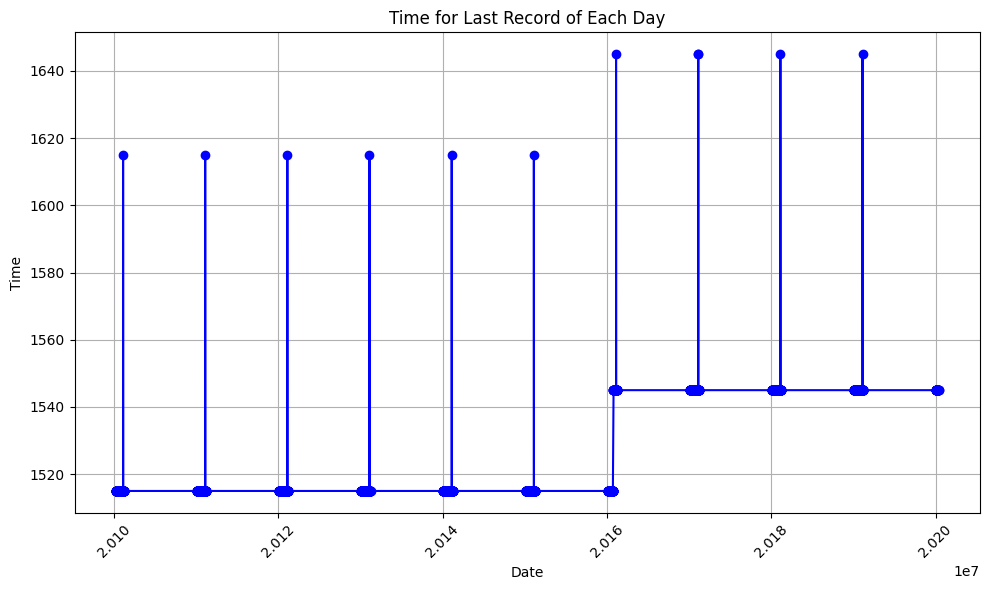

In [21]:
# 시각화: x축은 date, y축은 time
plt.figure(figsize=(10, 6))
plt.plot(last_1_per_day['date'], last_1_per_day['time'], marker='o', linestyle='-', color='b')

plt.title('Time for Last Record of Each Day')
plt.xlabel('Date')
plt.ylabel('Time')
plt.xticks(rotation=45) 
plt.grid(True)

plt.tight_layout()
plt.show()


이 그래프에서 알 수 있는 사실
- 2016년 초에 장 마감 시간이 한번 바뀜(1515->1545)
- 2년마다 늦게 장 마감을 하는 날이 있다!

In [22]:
print(last_1_per_day[last_1_per_day['time'] == 1515].tail(2))
print('--------------------------------------')
print(last_1_per_day[last_1_per_day['time'] == 1545].head(2))

# 2016년 8월을 기점으로 장 마감시간 변경됨

            date  time       time_diff
584053  20160728  1515 0 days 00:10:00
584419  20160729  1515 0 days 00:10:00
--------------------------------------
            date  time       time_diff
584814  20160801  1545 0 days 00:10:00
585205  20160802  1545 0 days 00:10:00


In [23]:
last_1_per_day['date'] = pd.to_datetime(last_1_per_day['date'], format='%Y%m%d')
last_1_per_day['weekday']= last_1_per_day['date'].dt.strftime('%A')
print(last_1_per_day[last_1_per_day['time'] == 1615])
print('--------------------------------------')
print(last_1_per_day[last_1_per_day['time'] == 1645])

             date  time       time_diff   weekday
69599  2010-11-18  1615 0 days 00:09:00  Thursday
158518 2011-11-10  1615 0 days 00:10:00  Thursday
249600 2012-11-08  1615 0 days 00:10:00  Thursday
339214 2013-11-07  1615 0 days 00:10:00  Thursday
430233 2014-11-13  1615 0 days 00:10:00  Thursday
520484 2015-11-12  1615 0 days 00:10:00  Thursday
--------------------------------------
             date  time       time_diff   weekday
613669 2016-11-17  1645 0 days 00:10:00  Thursday
710128 2017-11-16  1645 0 days 00:10:00  Thursday
712108 2017-11-23  1645 0 days 00:10:00  Thursday
806278 2018-11-15  1645 0 days 00:10:00  Thursday
903222 2019-11-14  1645 0 days 00:10:00  Thursday


- 오 다 목요일임
- 매년 11월 목요일 중 하루에 장 시간이 늘어남. (둘째주 or 셋째주)

In [24]:
# time이 1615 또는 1645인 데이터들의 date 값을 하나의 리스트에 저장
dates_combined = last_1_per_day[last_1_per_day['time'].isin([1615, 1645])]['date'].tolist()
print(dates_combined)


[Timestamp('2010-11-18 00:00:00'), Timestamp('2011-11-10 00:00:00'), Timestamp('2012-11-08 00:00:00'), Timestamp('2013-11-07 00:00:00'), Timestamp('2014-11-13 00:00:00'), Timestamp('2015-11-12 00:00:00'), Timestamp('2016-11-17 00:00:00'), Timestamp('2017-11-16 00:00:00'), Timestamp('2017-11-23 00:00:00'), Timestamp('2018-11-15 00:00:00'), Timestamp('2019-11-14 00:00:00')]


In [25]:
print(df_sorted[df_sorted['time_diff'] == pd.Timedelta('00:09:00')].loc[:, ['date', 'time', 'time_diff']])

print(df_sorted[df_sorted['time_diff'] == pd.Timedelta('00:09:00')].loc[:, ['date', 'time', 'time_diff']].value_counts('time'))

## 누락값인듯?


            date  time       time_diff
1830    20100222  1515 0 days 00:09:00
2563    20100224  1515 0 days 00:09:00
3296    20100226  1515 0 days 00:09:00
5493    20100309  1515 0 days 00:09:00
8422    20100319  1515 0 days 00:09:00
...          ...   ...             ...
297492  20130522  1515 0 days 00:09:00
312499  20130719  1515 0 days 00:09:00
320550  20130821  1515 0 days 00:09:00
329334  20130927  1515 0 days 00:09:00
347267  20131209  1515 0 days 00:09:00

[123 rows x 3 columns]
time
1515    122
1615      1
Name: count, dtype: int64


In [26]:

df_sorted.iloc[5493-3:5493+3].loc[:, ['date', 'time', 'time_diff']]


,date,time,time_diff
5490,20100309,1504,0 days 00:01:00
5491,20100309,1505,0 days 00:01:00
5492,20100309,1506,0 days 00:01:00
5493,20100309,1515,0 days 00:09:00
5494,20100310,901,0 days 17:46:00
5495,20100310,902,0 days 00:01:00


더 측정됐는데 뭐지...

매일 장 마감 10분 전의 데이터는 존재하지 않음. 근데 9분은 왜 있냐 이거지....

In [27]:
2376 + 123 + 1 # 2500
# 2500개 데이터 맞아서 그냥 가끔씩 1분 더 측정되나보다....? 라고 봐도 되는거야....?

2500

### 장 시작 시간

In [28]:
# 혹시 장 시작 시간이 바뀌지는 않았겠지?
first_1_per_day = df_sorted.groupby('date').head(1)[['date', 'time', 'time_diff']]
first_1_per_day['time'].value_counts()

# 어라 가끔 늦게 하는 날이 있네...
# 1515는 뭐지.....

time
901     2478
1001      21
1515       1
Name: count, dtype: int64

In [29]:
first_1_per_day[first_1_per_day['time'] == 1515]

,date,time,time_diff
38092,20100716,1515,1 days


In [30]:
df_sorted.iloc[38090:38095]
# 2010년 7월 16일의 데이터는 없다!!!

,date,time,open,high,low,close,prevClose,vol,datetime,time_diff
38090,20100715,1505,229.65,229.75,229.60,229.60,230.35,1463,2010-07-15 15:05:00,0 days 00:01:00
38091,20100715,1515,229.65,229.65,229.65,229.65,230.35,5157,2010-07-15 15:15:00,0 days 00:10:00
38092,20100716,1515,227.05,229.95,227.05,229.10,229.65,3901,2010-07-16 15:15:00,1 days 00:00:00
38093,20100719,901,224.60,224.70,224.15,224.60,227.05,5831,2010-07-19 09:01:00,2 days 17:46:00
38094,20100719,902,224.65,224.75,224.05,224.30,227.05,3957,2010-07-19 09:02:00,0 days 00:01:00


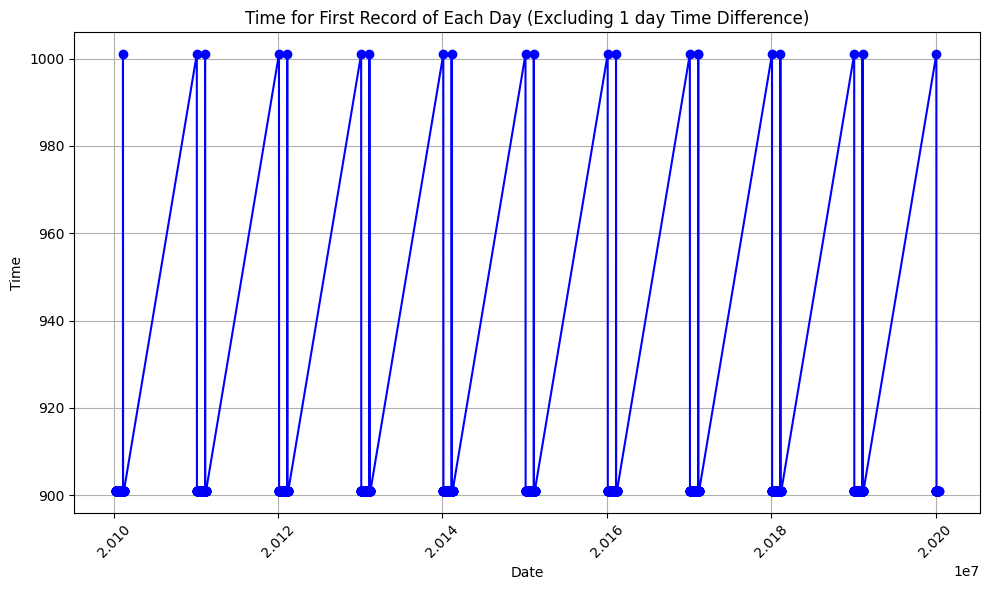

In [31]:
# 시각화: x축은 date, y축은 time
first_1_per_day_filtered = first_1_per_day[first_1_per_day['time_diff'] != pd.Timedelta('1 days')]

# 시각화: x축은 date, y축은 time
plt.figure(figsize=(10, 6))
plt.plot(first_1_per_day_filtered['date'], first_1_per_day_filtered['time'], marker='o', linestyle='-', color='b')

plt.title('Time for First Record of Each Day (Excluding 1 day Time Difference)')
plt.xlabel('Date')
plt.ylabel('Time')
plt.xticks(rotation=45) 
plt.grid(True)

plt.tight_layout()
plt.show()


나름 되게 규칙적임

In [32]:
# 그래서 장을 늦게 여는 날이 언젠데?!
print(first_1_per_day[first_1_per_day['time'] == 1001])


            date  time       time_diff
69233   20101118  1001 0 days 18:46:00
80588   20110103  1001 3 days 18:46:00
158153  20111110  1001 0 days 18:46:00
171332  20120102  1001 3 days 18:46:00
249235  20121108  1001 0 days 18:46:00
262046  20130102  1001 4 days 18:46:00
338849  20131107  1001 0 days 18:46:00
352389  20140102  1001 2 days 18:46:00
429868  20141113  1001 0 days 18:46:00
441925  20150102  1001 2 days 18:46:00
520119  20151112  1001 0 days 18:46:00
532558  20160104  1001 4 days 18:46:00
613274  20161117  1001 0 days 18:16:00
625526  20170102  1001 3 days 18:16:00
709733  20171116  1001 0 days 18:16:00
711713  20171123  1001 0 days 18:16:00
721608  20180102  1001 4 days 18:16:00
805883  20181115  1001 0 days 18:16:00
818158  20190102  1001 4 days 18:16:00
902827  20191114  1001 0 days 18:16:00
915498  20200102  1001 2 days 18:16:00


In [33]:
# 위에서 봤떤 날짜들이다...
# 장을 늦게 연 날에 늦게 닫았다.

# 1. first_1_per_day에서 time이 1001인 날짜 추출
dates_1001 = first_1_per_day[first_1_per_day['time'] == 1001]['date']

# 2. dates_1001을 Timestamp로 변환
dates_1001_timestamp = pd.to_datetime(dates_1001, format='%Y%m%d')

# 3. dates_combined가 이미 Timestamp 형태이므로 비교를 위해 그대로 사용

# 4. 교집합 구하기
common_dates = pd.to_datetime(dates_combined).intersection(dates_1001_timestamp)

# 5. 교집합 날짜와 개수 출력
print("Common Dates:", common_dates)
print("Number of Common Dates:", len(common_dates))


Common Dates: DatetimeIndex(['2010-11-18', '2011-11-10', '2012-11-08', '2013-11-07',
               '2014-11-13', '2015-11-12', '2016-11-17', '2017-11-16',
               '2017-11-23', '2018-11-15', '2019-11-14'],
              dtype='datetime64[ns]', freq=None)
Number of Common Dates: 11


In [34]:
# 1. first_1_per_day에서 time이 1001인 날짜 추출
dates_1001 = first_1_per_day[first_1_per_day['time'] == 1001]['date']

# 2. dates_1001을 Timestamp로 변환
dates_1001_timestamp = pd.to_datetime(dates_1001, format='%Y%m%d')

# 3. dates_combined가 이미 Timestamp 형태이므로 그대로 사용
dates_combined_timestamp = pd.to_datetime(dates_combined)

# 4. 차집합 구하기
non_common_dates = dates_1001_timestamp[~dates_1001_timestamp.isin(dates_combined_timestamp)]

# 5. 차집합 날짜 출력
print("Non-Common Dates:", non_common_dates)
print("Number of Non-Common Dates:", len(non_common_dates))

## 매년 1월 2일에는 장을 늦게 열었다!!!

Non-Common Dates: 80588    2011-01-03
171332   2012-01-02
262046   2013-01-02
352389   2014-01-02
441925   2015-01-02
532558   2016-01-04
625526   2017-01-02
721608   2018-01-02
818158   2019-01-02
915498   2020-01-02
Name: date, dtype: datetime64[ns]
Number of Non-Common Dates: 10


### 이제 2분만 확인하면 됨

2분 ㄱㄱ

In [35]:
print(df_sorted[df_sorted['time_diff'] == pd.Timedelta('00:02:00')].loc[:, ['date', 'time', 'time_diff']])

print(df_sorted[df_sorted['time_diff'] == pd.Timedelta('00:02:00')].loc[:, ['date', 'time', 'time_diff']].value_counts('time'))

## 누락값인듯?

            date  time       time_diff
78192   20101222  1149 0 days 00:02:00
203039  20120508  1351 0 days 00:02:00
211954  20120614   955 0 days 00:02:00
239882  20121002  1145 0 days 00:02:00
256273  20121205  1024 0 days 00:02:00
...          ...   ...             ...
894399  20191015  1342 0 days 00:02:00
895169  20191017  1321 0 days 00:02:00
897948  20191028  1329 0 days 00:02:00
902259  20191112  1245 0 days 00:02:00
907824  20191202  1307 0 days 00:02:00

[385 rows x 3 columns]
time
1314    7
1341    7
1245    6
1257    6
1335    6
       ..
1418    1
1421    1
1434    1
1435    1
1440    1
Name: count, Length: 162, dtype: int64


In [36]:
df_sorted.iloc[78192-3:78192+3].loc[:, ['date', 'time', 'time_diff']]

,date,time,time_diff
78189,20101222,1145,0 days 00:01:00
78190,20101222,1146,0 days 00:01:00
78191,20101222,1147,0 days 00:01:00
78192,20101222,1149,0 days 00:02:00
78193,20101222,1150,0 days 00:01:00
78194,20101222,1151,0 days 00:01:00


In [37]:
df_sorted.iloc[894399-3:894399+3].loc[:, ['date', 'time', 'time_diff']]

,date,time,time_diff
894396,20191015,1338,0 days 00:01:00
894397,20191015,1339,0 days 00:01:00
894398,20191015,1340,0 days 00:01:00
894399,20191015,1342,0 days 00:02:00
894400,20191015,1343,0 days 00:01:00
894401,20191015,1344,0 days 00:01:00


In [38]:
# 누락값이 있는 date-time
# 해당 시간보다 하나 앞이 누락이라는 뜻

df_sorted[df_sorted['time_diff'] == pd.Timedelta('00:02:00')].loc[:, ['date', 'time']]

,date,time
78192,20101222,1149
203039,20120508,1351
211954,20120614,955
239882,20121002,1145
256273,20121205,1024
...,...,...
894399,20191015,1342
895169,20191017,1321
897948,20191028,1329
902259,20191112,1245


결론: 결측치가 존재함

# 결측치를 어떻게 채울것인가

# 기본 시각화

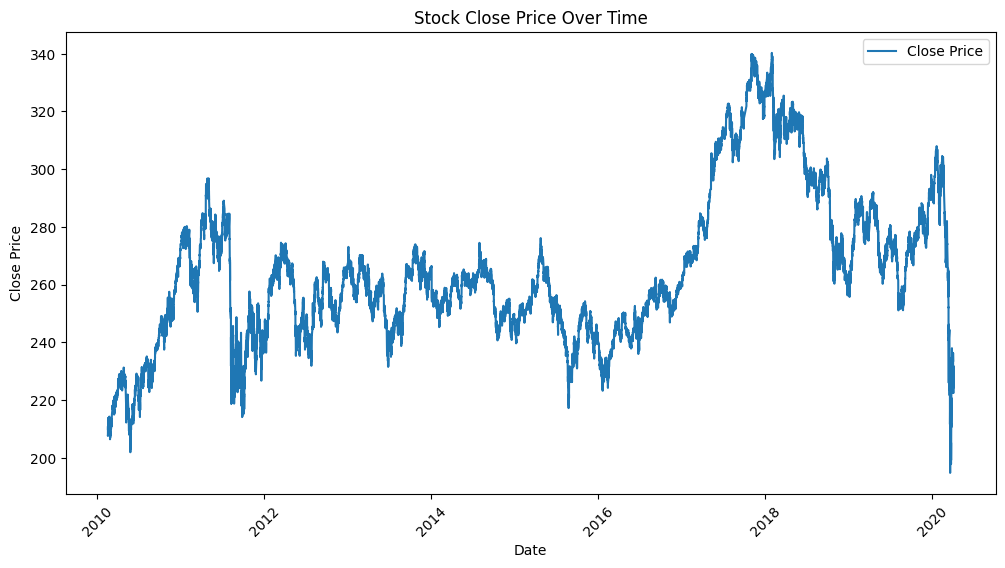

In [39]:
# 'close' 시세 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['datetime'], df_sorted['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Price Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()


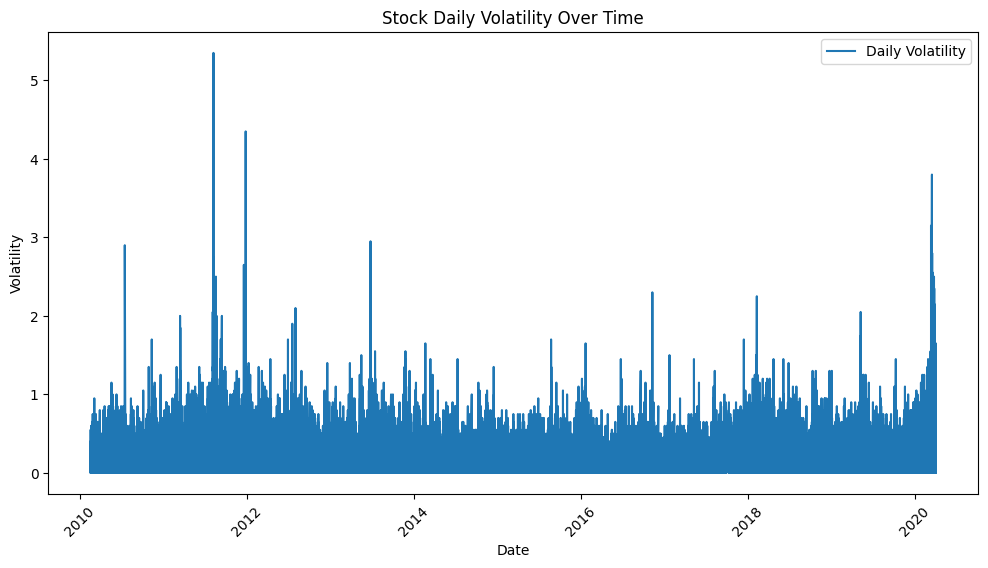

In [40]:
# 일일 변동성 계산
df_sorted['volatility'] = df_sorted['high'] - df_sorted['low']

# 변동성 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['datetime'], df_sorted['volatility'], label='Daily Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Stock Daily Volatility Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()


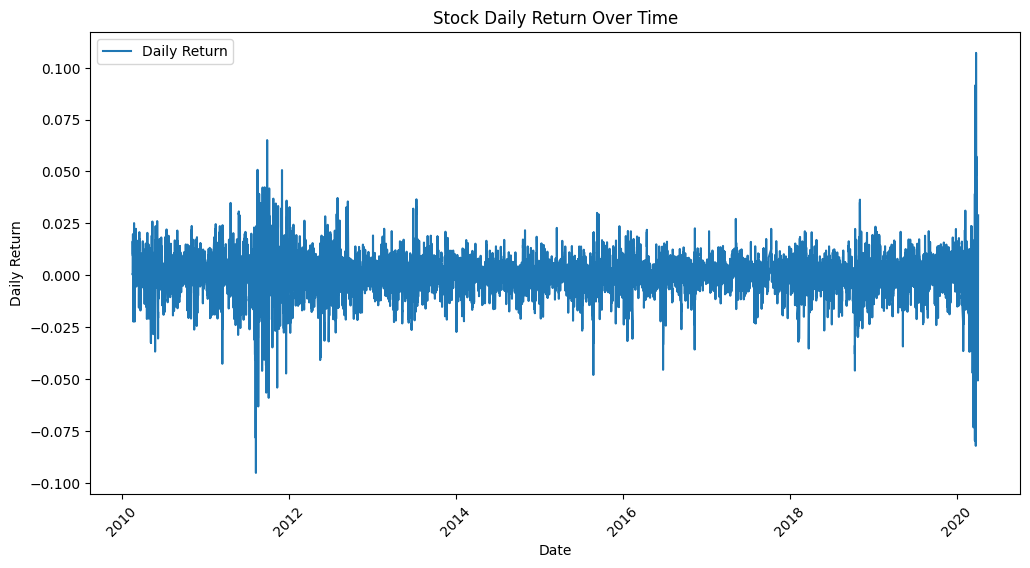

In [41]:
# 일일 수익률 계산
df_sorted['daily_return'] = (df_sorted['close'] - df_sorted['prevClose']) / df_sorted['prevClose']

# 일일 수익률 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['datetime'], df_sorted['daily_return'], label='Daily Return')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Stock Daily Return Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()


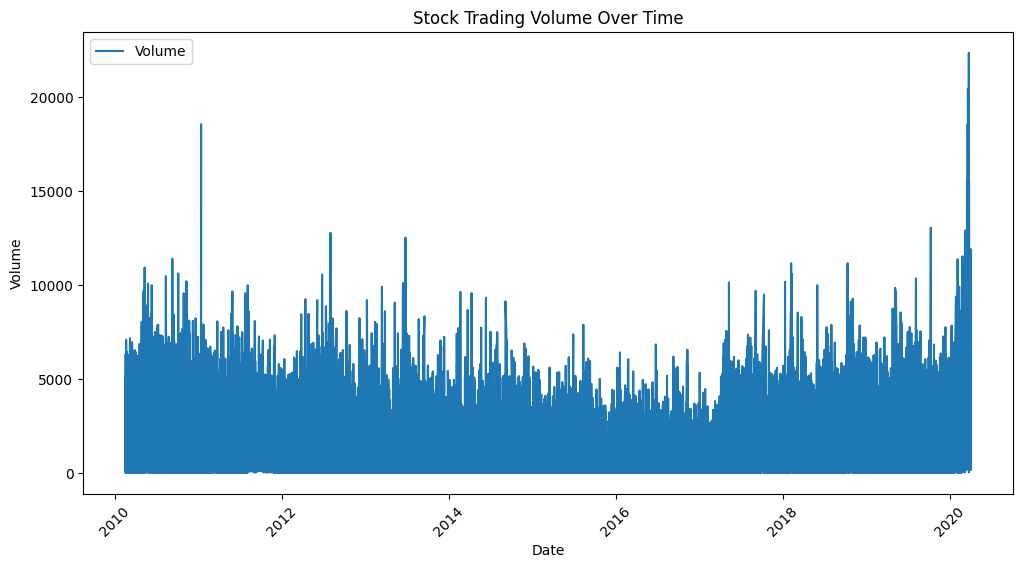

In [42]:
# 거래량 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['datetime'], df_sorted['vol'], label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Stock Trading Volume Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()


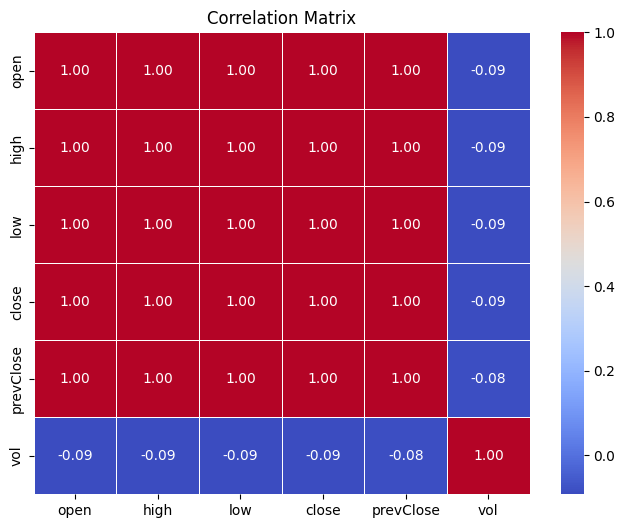

In [43]:
# 상관관계 분석
corr_matrix = df_sorted[['open', 'high', 'low', 'close', 'prevClose', 'vol']].corr()

# 상관관계 히트맵 시각화
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


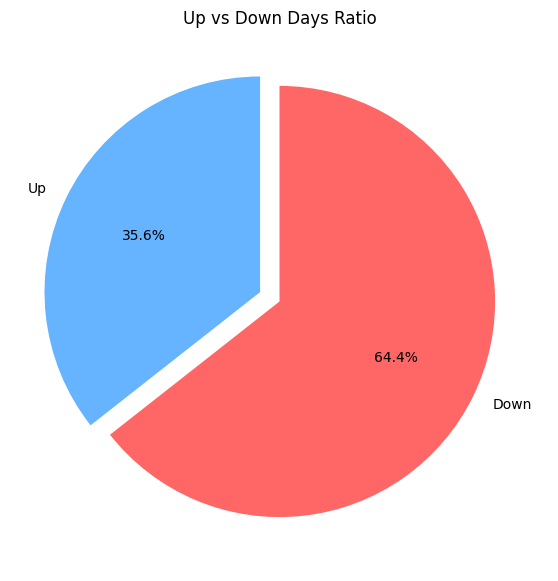

In [44]:
# 상승/하락 일수 비율 분석
df_sorted['price_trend'] = df_sorted['close'].diff().apply(lambda x: 'Up' if x > 0 else 'Down')

up_days = df_sorted[df_sorted['price_trend'] == 'Up'].shape[0]
down_days = df_sorted[df_sorted['price_trend'] == 'Down'].shape[0]

# 비율 계산
total_days = up_days + down_days
up_ratio = up_days / total_days * 100
down_ratio = down_days / total_days * 100

# 비율 시각화
labels = ['Up', 'Down']
sizes = [up_ratio, down_ratio]
colors = ['#66b3ff', '#ff6666']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0.1, 0))
plt.title('Up vs Down Days Ratio')
plt.show()


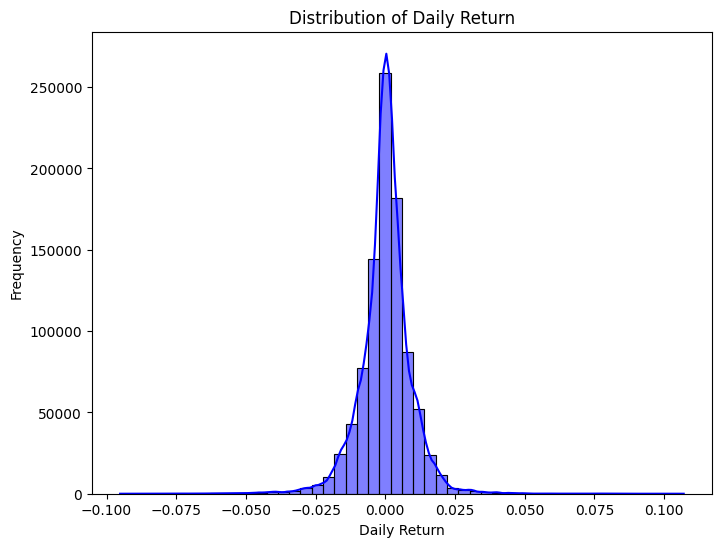

In [45]:
# 주식 리턴 분포 시각화
plt.figure(figsize=(8, 6))
sns.histplot(df_sorted['daily_return'], kde=True, bins=50, color='blue')
plt.title('Distribution of Daily Return')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


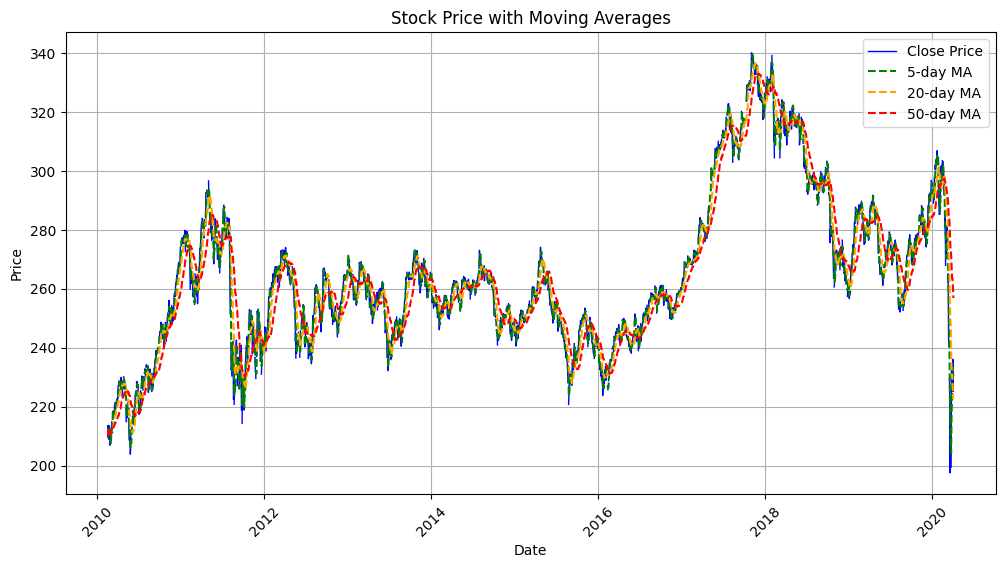

In [46]:
# 일별 종가만 남기기 (일별 마지막 거래 데이터 사용)
df_daily = df_sorted.resample('D', on='datetime').last()

# 이동 평균 계산
df_daily['MA_5'] = df_daily['close'].rolling(window=5, min_periods=1).mean()
df_daily['MA_20'] = df_daily['close'].rolling(window=20, min_periods=1).mean()
df_daily['MA_50'] = df_daily['close'].rolling(window=50, min_periods=1).mean()

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['close'], label='Close Price', color='blue', linewidth=1)
plt.plot(df_daily.index, df_daily['MA_5'], label='5-day MA', color='green', linestyle='dashed')
plt.plot(df_daily.index, df_daily['MA_20'], label='20-day MA', color='orange', linestyle='dashed')
plt.plot(df_daily.index, df_daily['MA_50'], label='50-day MA', color='red', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with Moving Averages')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


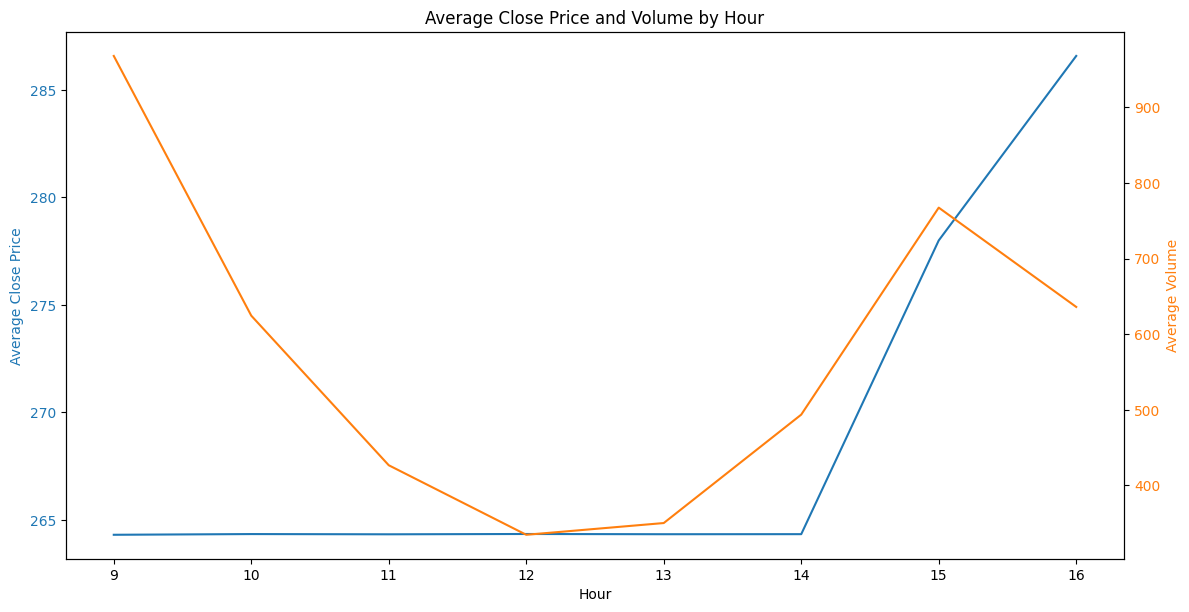

In [47]:
# 'time'을 기준으로 그룹화하여 평균 가격과 거래량 계산
df_sorted['hour'] = df_sorted['time'] // 100  # 시간대 추출 (901 -> 9시, 902 -> 9시, ...)
hourly_data = df_sorted.groupby('hour').agg({'close': 'mean', 'vol': 'mean'}).reset_index()

# 시간대별 평균 가격과 거래량 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Hour')
ax1.set_ylabel('Average Close Price', color='tab:blue')
ax1.plot(hourly_data['hour'], hourly_data['close'], color='tab:blue', label='Average Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Volume', color='tab:orange')
ax2.plot(hourly_data['hour'], hourly_data['vol'], color='tab:orange', label='Average Volume')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.title('Average Close Price and Volume by Hour')
plt.show()


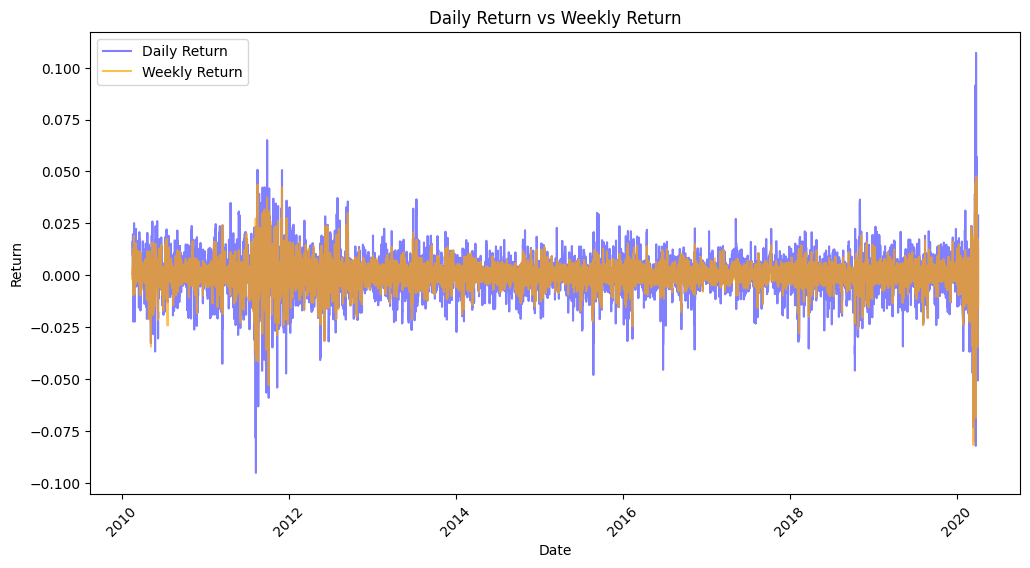

In [48]:
# 주간 수익률 계산 (7일 간격)
df_sorted['week_return'] = df_sorted['close'].pct_change(periods=5)

# 일간 리턴과 주간 리턴 비교 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['datetime'], df_sorted['daily_return'], label='Daily Return', color='blue', alpha=0.5)
plt.plot(df_sorted['datetime'], df_sorted['week_return'], label='Weekly Return', color='orange', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Daily Return vs Weekly Return')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# 시각화 2

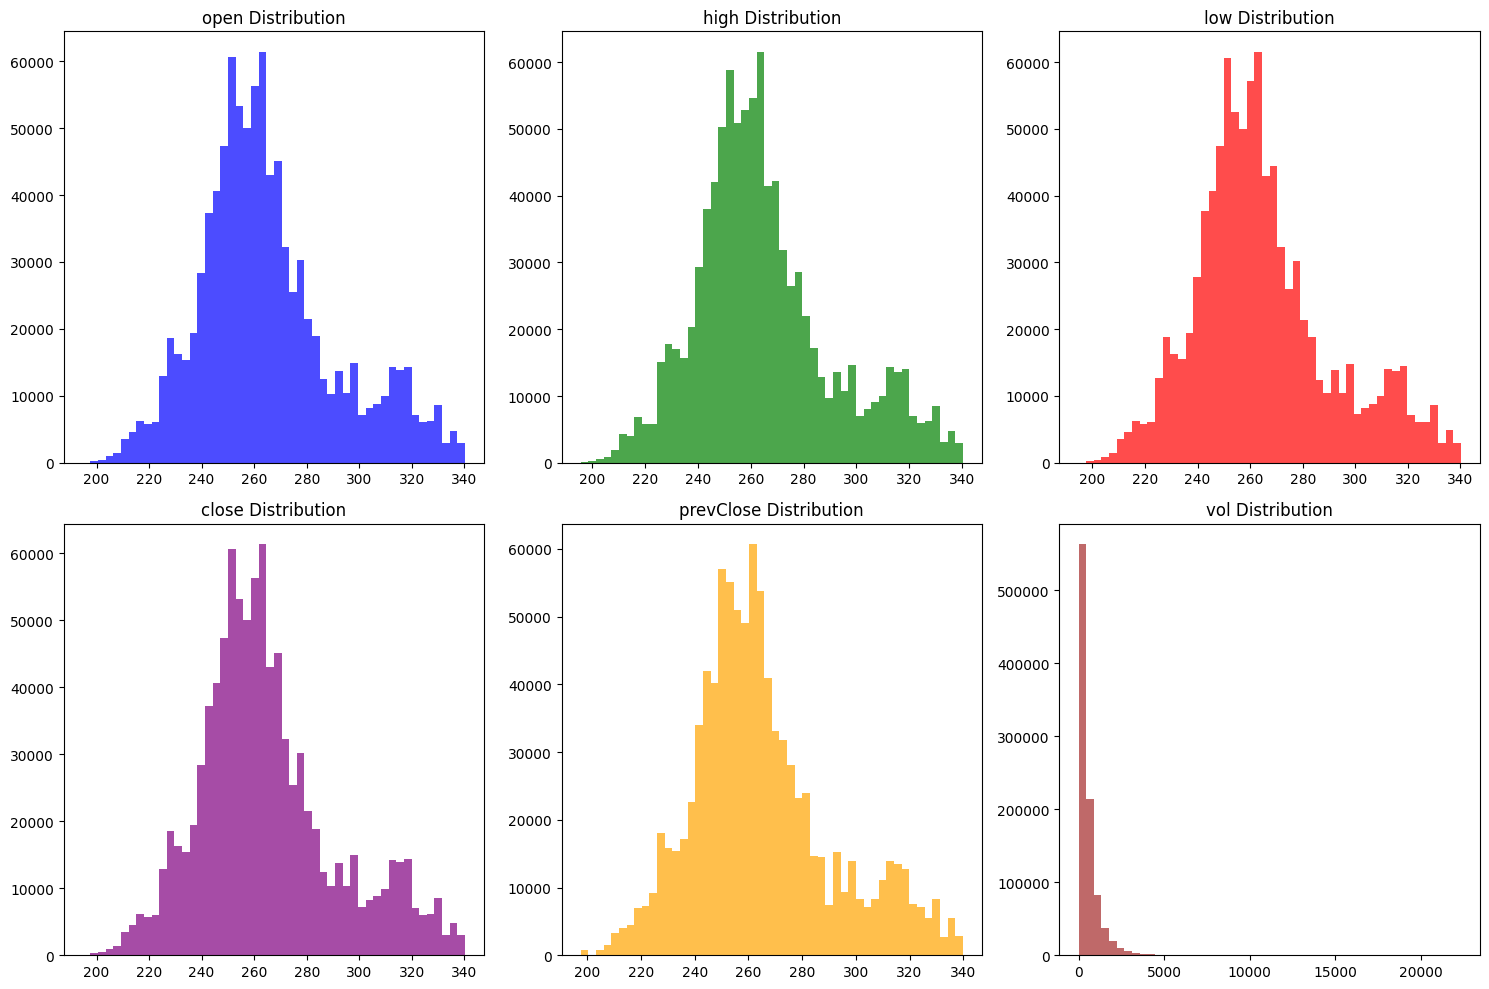

In [53]:
columns = ['open', 'high', 'low', 'close', 'prevClose', 'vol']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(columns):
    axes[i].hist(df_sorted[col], bins=50, color=colors[i], alpha=0.7)
    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


## Vol 변수

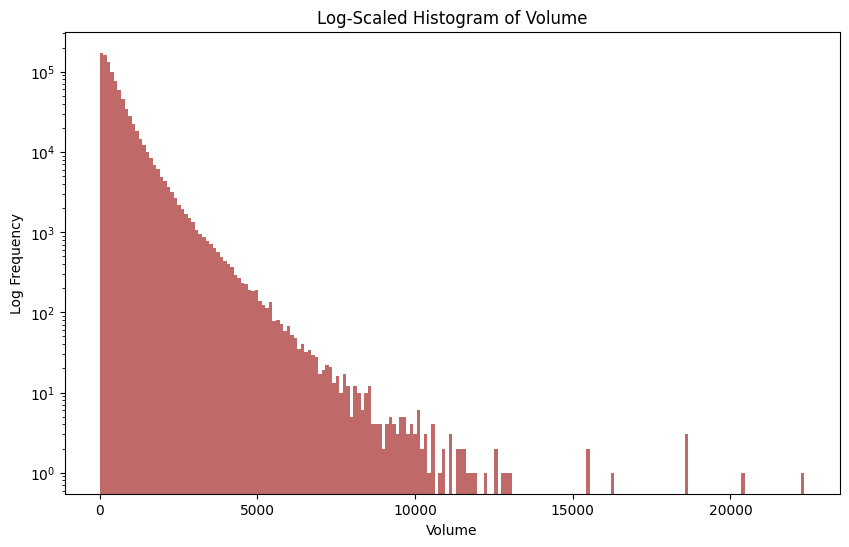

In [56]:
plt.figure(figsize=(10, 6))
plt.hist(df_sorted['vol'], bins=200, color='brown', alpha=0.7)
plt.yscale('log')  # y축 로그 스케일 적용
plt.title("Log-Scaled Histogram of Volume")
plt.xlabel("Volume")
plt.ylabel("Log Frequency")
plt.show()


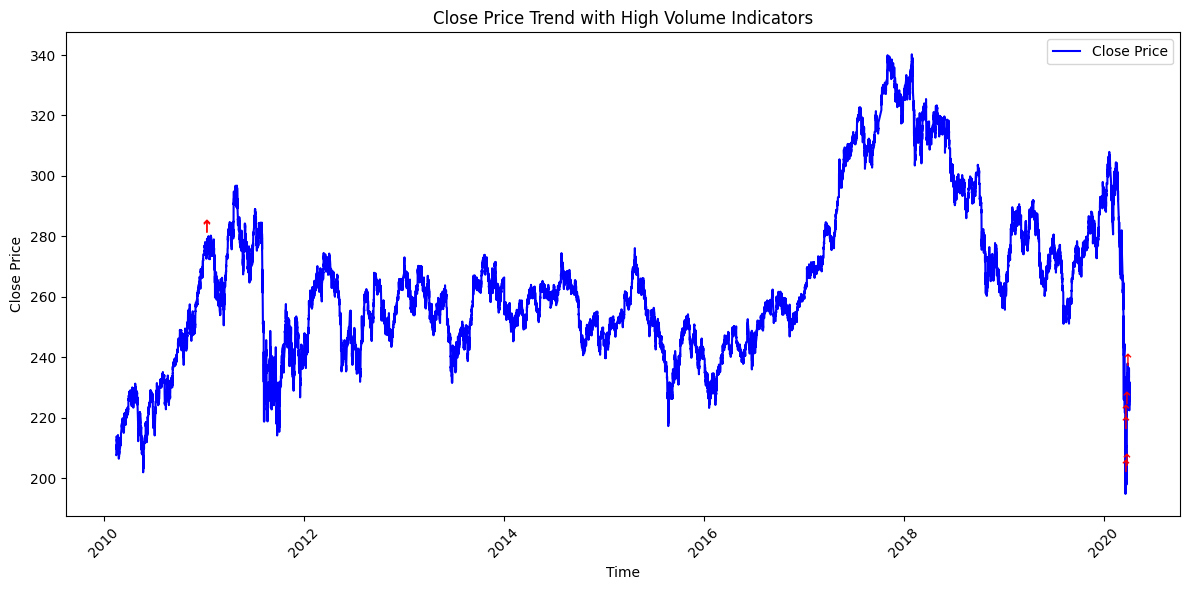

In [63]:
# 이렇게 거래량이 많았던 게 언제일까

# 데이터 준비
x = df_sorted['datetime']  # 시간
y = df_sorted['close']  # 종가
vol_threshold = 15000  # 거래량 기준
high_vol_indices = df_sorted[df_sorted['vol'] >= vol_threshold].index  # 거래량이 10000 이상인 인덱스
high_vol_values = df_sorted.loc[high_vol_indices, 'close']  # 해당 인덱스의 종가 값

# 추세 그래프
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Close Price', color='blue')

# 화살표 표시 (거래량이 10000 이상인 지점)
for idx in high_vol_indices:
    plt.annotate('↑', (x[idx], df_sorted.loc[idx, 'close']),
                 textcoords="offset points", xytext=(0, 10),
                 ha='center', fontsize=12, color='red')

# 그래프 타이틀 및 레이블 설정
plt.title("Close Price Trend with High Volume Indicators")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()

# 그래프 출력
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()



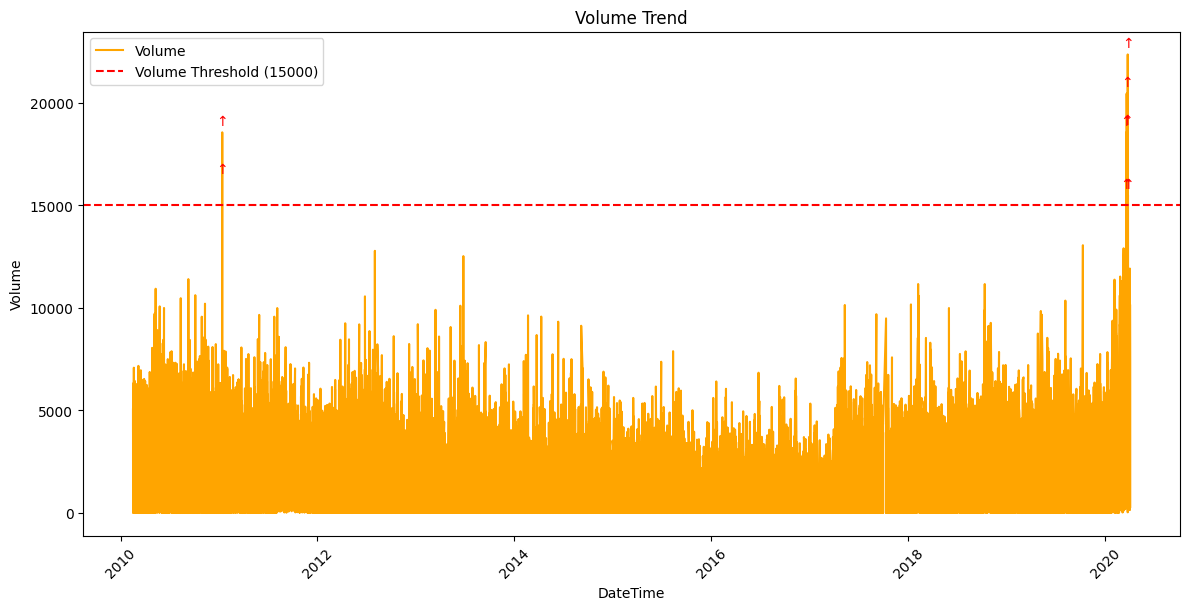

In [61]:
# 알고보면 그냥 거래량 자체가 증가한 거 아닐까?

import matplotlib.pyplot as plt

# 데이터 준비
x = df_sorted['datetime']  # datetime을 x축으로 사용
y_vol = df_sorted['vol']  # 거래량

# 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(x, y_vol, label='Volume', color='orange')

# y축 레이블, x축 레이블, 타이틀 설정
plt.xlabel('DateTime')
plt.ylabel('Volume')
plt.title('Volume Trend')

# y축을 15000 이상의 값으로 강조 표시
plt.axhline(y=15000, color='red', linestyle='--', label='Volume Threshold (15000)')

# 15000 이상인 구간에 화살표 추가
for i in range(1, len(y_vol)):
    if y_vol[i] >= 15000:
        plt.annotate('↑', (x[i], y_vol[i]), textcoords="offset points", xytext=(0, 5), ha='center', color='red')

# 범례 추가
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.xticks(rotation=45)  # x축 레이블을 읽기 쉽게 45도 회전
plt.show()


In [ ]:
df_sorted[df_sorted['vol']>=10000].sort_values('vol', ascending=False).head(20)

# 거래량이 많을 때는 보통 시작과 끝임.

,date,time,open,high,low,close,prevClose,vol,datetime,time_diff,volatility,daily_return,price_trend,hour,week_return
937951,20200324,1545,220.00,220.00,220.00,220.00,199.40,22348,2020-03-24 15:45:00,0 days 00:10:00,0.00,0.103310,Up,15,-0.001815
937159,20200320,1545,215.55,215.55,215.55,215.55,197.50,20440,2020-03-20 15:45:00,0 days 00:10:00,0.00,0.091392,Up,15,0.011260
937555,20200323,1545,199.40,199.40,199.40,199.40,215.55,18631,2020-03-23 15:45:00,0 days 00:10:00,0.00,-0.074925,Down,15,-0.004990
936763,20200319,1545,197.50,197.50,197.50,197.50,211.60,18552,2020-03-19 15:45:00,0 days 00:10:00,0.00,-0.066635,Down,15,-0.002021
83457,20110113,901,276.50,276.50,275.80,276.50,276.50,18552,2011-01-13 09:01:00,0 days 17:46:00,0.70,0.000000,Down,9,-0.001625
83459,20110113,903,276.50,277.10,276.30,276.75,276.50,16204,2011-01-13 09:03:00,0 days 00:01:00,0.80,0.000904,Up,9,-0.000361
938347,20200325,1545,232.50,232.50,232.50,232.50,220.00,15488,2020-03-25 15:45:00,0 days 00:10:00,0.00,0.056818,Up,15,0.003020
936396,20200318,1545,211.60,211.60,211.60,211.60,224.40,15481,2020-03-18 15:45:00,0 days 00:10:00,0.00,-0.057041,Down,15,-0.010521
892933,20191010,901,268.20,269.55,268.10,269.30,272.25,13050,2019-10-10 09:01:00,1 days 17:16:00,1.45,-0.010836,Down,9,-0.010654
933258,20200309,901,265.40,266.50,265.25,265.60,274.20,12900,2020-03-09 09:01:00,2 days 17:16:00,1.25,-0.031364,Down,9,-0.033830


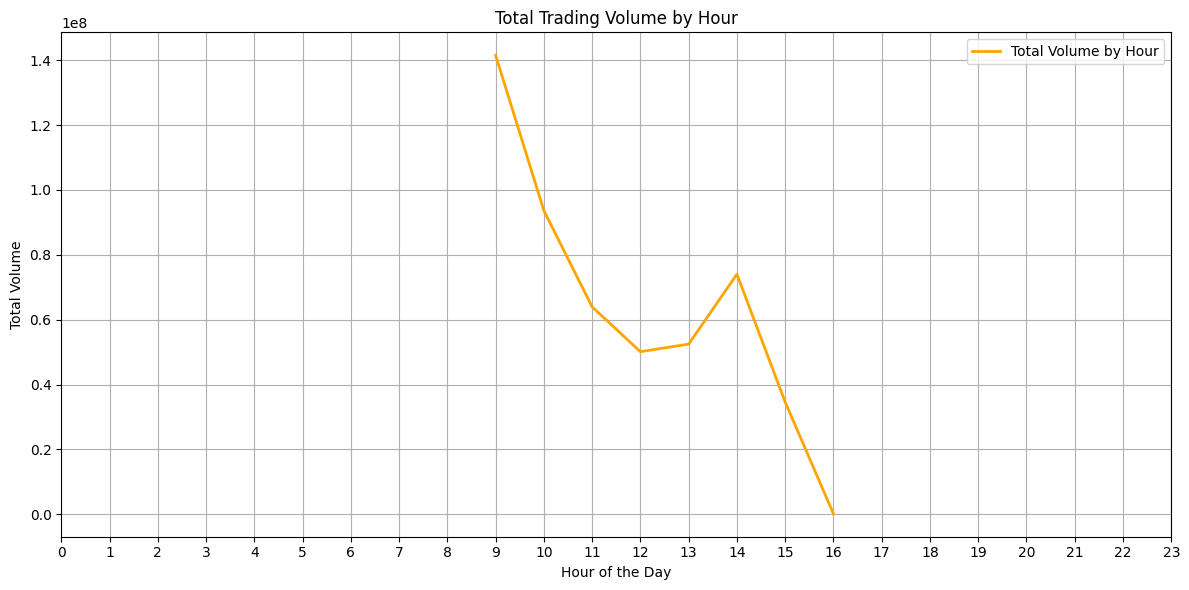

In [82]:
# 시간대별 거래량 합산
hourly_vol = df_sorted.groupby('hour')['vol'].sum()

# 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(hourly_vol.index, hourly_vol.values, label='Total Volume by Hour', color='orange', linewidth=2)

# y축 레이블, x축 레이블, 타이틀 설정
plt.xlabel('Hour of the Day')
plt.ylabel('Total Volume')
plt.title('Total Trading Volume by Hour')

# 그래프에 레이블 추가
plt.xticks(range(24))  # x축을 0부터 23까지의 시간대로 설정
plt.grid(True)
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

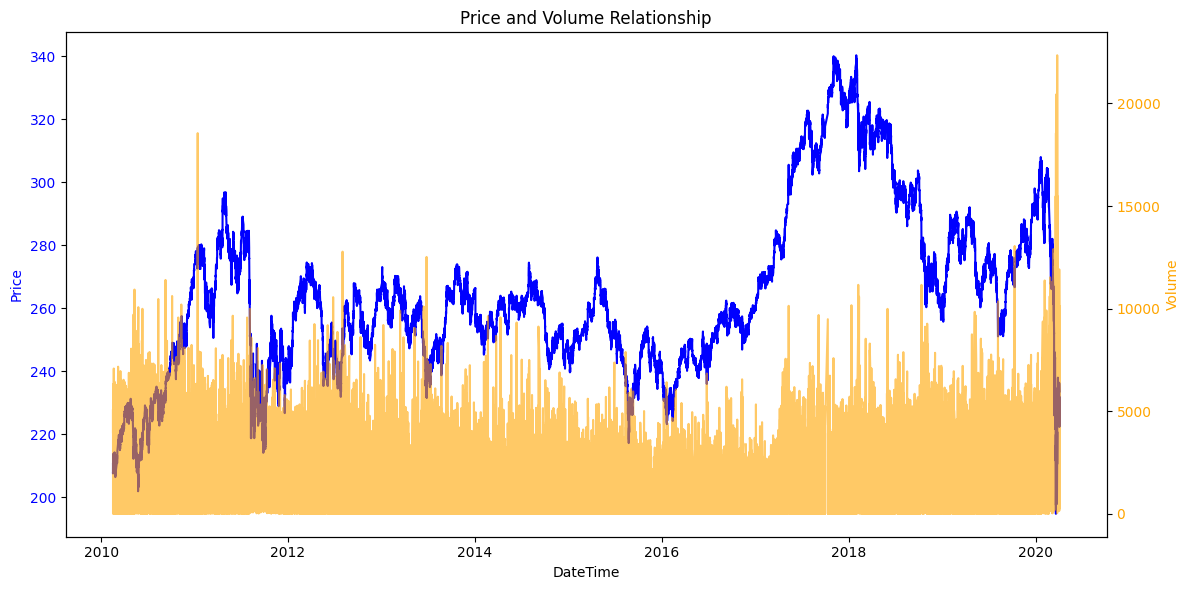

In [71]:

# 가격과 거래량 데이터를 준비
x = df_sorted['datetime']
y_price = df_sorted['close']
y_vol = df_sorted['vol']

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 가격 그래프
ax1.plot(x, y_price, color='blue', label='Close Price')
ax1.set_xlabel('DateTime')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 거래량 그래프 (2번째 y축)
ax2 = ax1.twinx()  # y축을 공유하는 두 번째 축
ax2.plot(x, y_vol, color='orange', label='Volume', alpha=0.6)
ax2.set_ylabel('Volume', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Price and Volume Relationship')
plt.tight_layout()
plt.show()


In [72]:
correlation = df_sorted['close'].corr(df_sorted['vol'])
print(f"Price-Volume Correlation: {correlation}")


Price-Volume Correlation: -0.09012173084069365


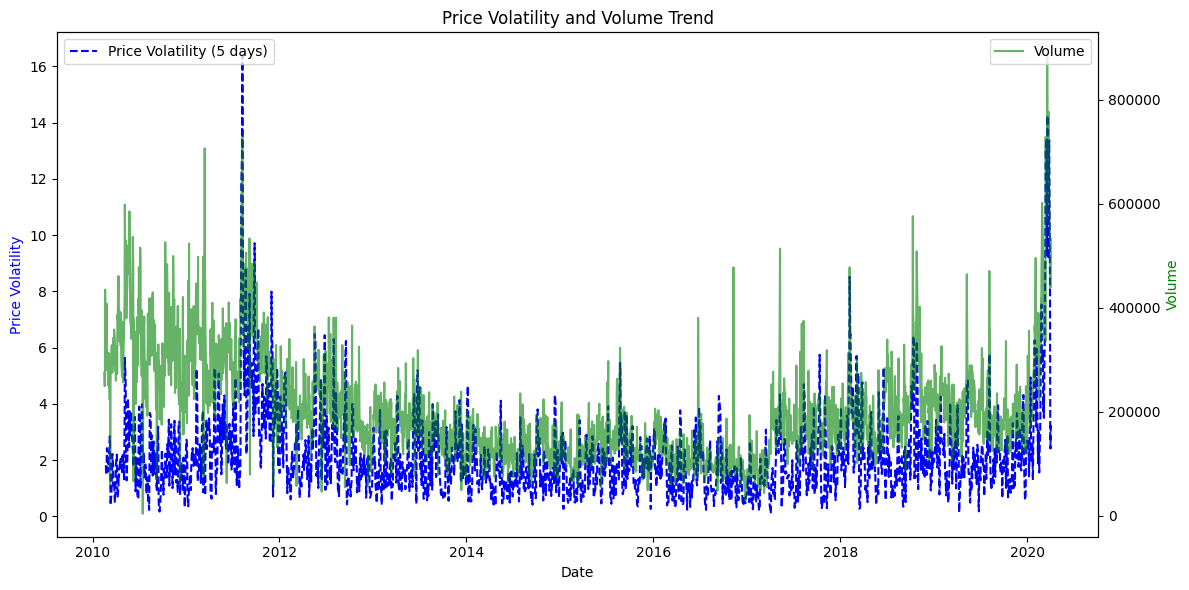

In [75]:
# 하루 단위로 가격과 거래량의 데이터를 묶기
df_daily = df_sorted.groupby('date').agg({'close': 'mean', 'vol': 'sum'})

# 5일 이동 평균
df_daily['price_ma'] = df_daily['close'].rolling(window=5).mean()

# 5일 표준편차를 사용하여 변동성 계산
df_daily['price_volatility'] = df_daily['close'].rolling(window=5).std()

# 시각화
plt.figure(figsize=(12, 6))

# 가격의 변동성과 거래량을 시각화
ax1 = plt.gca()
ax2 = ax1.twinx()

# 가격 변동성과 거래량 그래프
ax1.plot(df_daily.index, df_daily['price_volatility'], label='Price Volatility (5 days)', color='blue', linestyle='--')
ax2.plot(df_daily.index, df_daily['vol'], label='Volume', color='green', alpha=0.6)

# 레이블 추가
ax1.set_xlabel('Date')
ax1.set_ylabel('Price Volatility', color='blue')
ax2.set_ylabel('Volume', color='green')

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 타이틀 추가
plt.title('Price Volatility and Volume Trend')

# x축 레이블 각도 조정
plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()


상관계수 (Price Volatility vs Volume): 0.5512


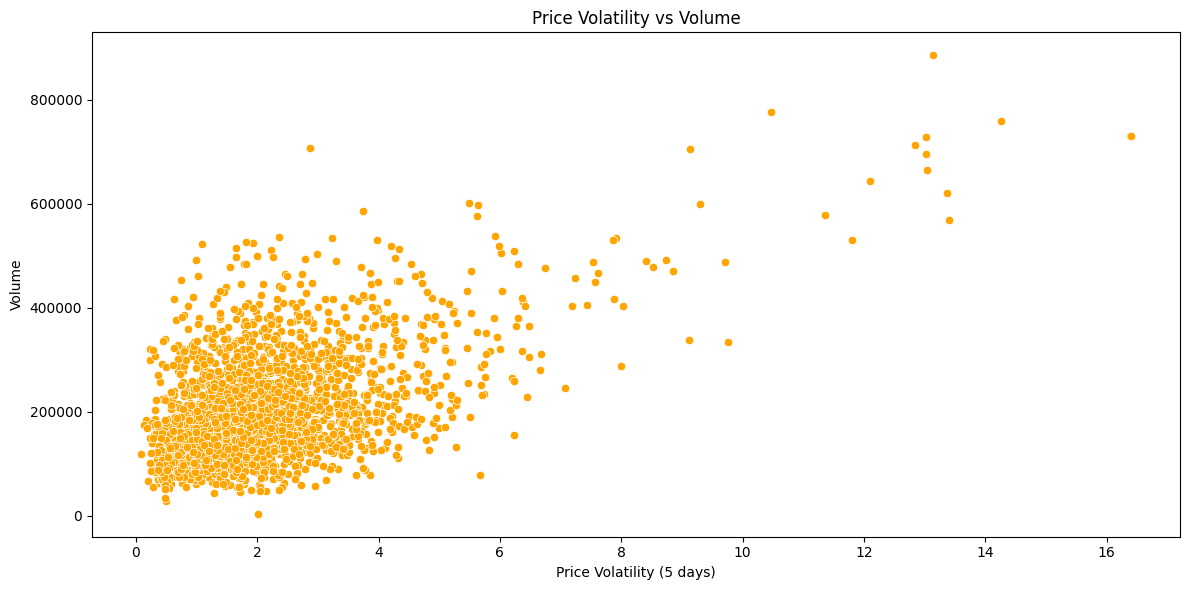

In [ ]:
# 하루 단위로 가격과 거래량의 데이터를 묶기
df_daily = df_sorted.groupby('date').agg({'close': 'mean', 'vol': 'sum'})

# 5일 표준편차를 사용하여 변동성 계산
df_daily['price_volatility'] = df_daily['close'].rolling(window=5).std()

# 상관계수 계산 (Pearson Correlation)
correlation = df_daily['price_volatility'].corr(df_daily['vol'])

# 상관계수 출력
print(f"상관계수 (Price Volatility vs Volume): {correlation:.4f}")

# 상관 관계 시각화
plt.figure(figsize=(12, 6))

# 산점도 (Price Volatility vs Volume)
sns.scatterplot(x=df_daily['price_volatility'], y=df_daily['vol'], color='orange')

# 레이블 추가
plt.xlabel('Price Volatility (5 days)')
plt.ylabel('Volume')
plt.title('Price Volatility vs Volume')

# 타이틀, 레이블 출력
plt.tight_layout()
plt.show()


2일 윈도우에서 상관계수 (Price Volatility vs Volume): 0.4341
3일 윈도우에서 상관계수 (Price Volatility vs Volume): 0.4918
4일 윈도우에서 상관계수 (Price Volatility vs Volume): 0.5280
5일 윈도우에서 상관계수 (Price Volatility vs Volume): 0.5512
6일 윈도우에서 상관계수 (Price Volatility vs Volume): 0.5589
7일 윈도우에서 상관계수 (Price Volatility vs Volume): 0.5569
8일 윈도우에서 상관계수 (Price Volatility vs Volume): 0.5566
10일 윈도우에서 상관계수 (Price Volatility vs Volume): 0.5484
15일 윈도우에서 상관계수 (Price Volatility vs Volume): 0.5388
20일 윈도우에서 상관계수 (Price Volatility vs Volume): 0.5360
30일 윈도우에서 상관계수 (Price Volatility vs Volume): 0.5392


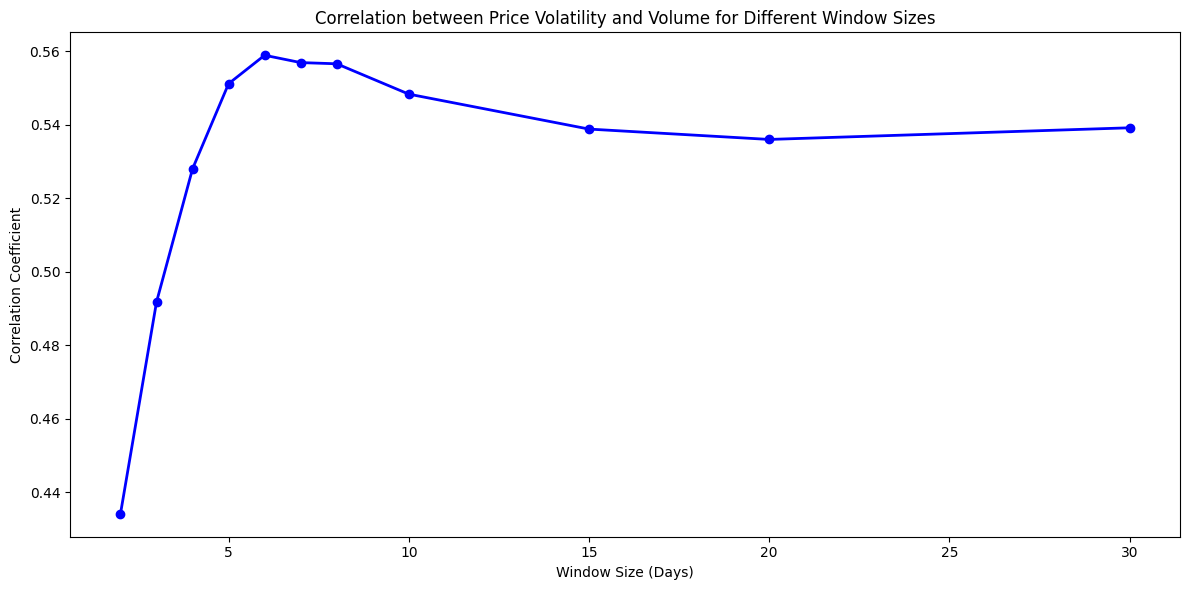

In [ ]:
# 특정 n일간의 변동성과 당일의 거래량 간의 관계

# 하루 단위로 가격과 거래량의 데이터를 묶기
df_daily = df_sorted.groupby('date').agg({'close': 'mean', 'vol': 'sum'})

# 다양한 윈도우 크기 설정 (예: 5, 10, 20, 30)
window_sizes = [2, 3, 4, 5, 6, 7, 8, 10, 15, 20, 30]

# 상관계수를 저장할 리스트
correlations = []

# 각 윈도우 크기에 대해 변동성 계산 및 상관계수 계산
for window in window_sizes:
    # 변동성 계산 (5일, 10일, 20일, 30일)
    df_daily[f'price_volatility_{window}'] = df_daily['close'].rolling(window=window).std()

    # 상관계수 계산 (변동성 vs 거래량)
    correlation = df_daily[f'price_volatility_{window}'].corr(df_daily['vol'])
    correlations.append(correlation)

# 결과 출력
for window, correlation in zip(window_sizes, correlations):
    print(f"{window}일 윈도우에서 상관계수 (Price Volatility vs Volume): {correlation:.4f}")

# 상관계수를 시각화
plt.figure(figsize=(12, 6))
plt.plot(window_sizes, correlations, marker='o', color='blue', linestyle='-', linewidth=2)

# 레이블 추가
plt.xlabel('Window Size (Days)')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation between Price Volatility and Volume for Different Window Sizes')

# 결과 출력
plt.tight_layout()
plt.show()


# 자기상관 그래프 확인

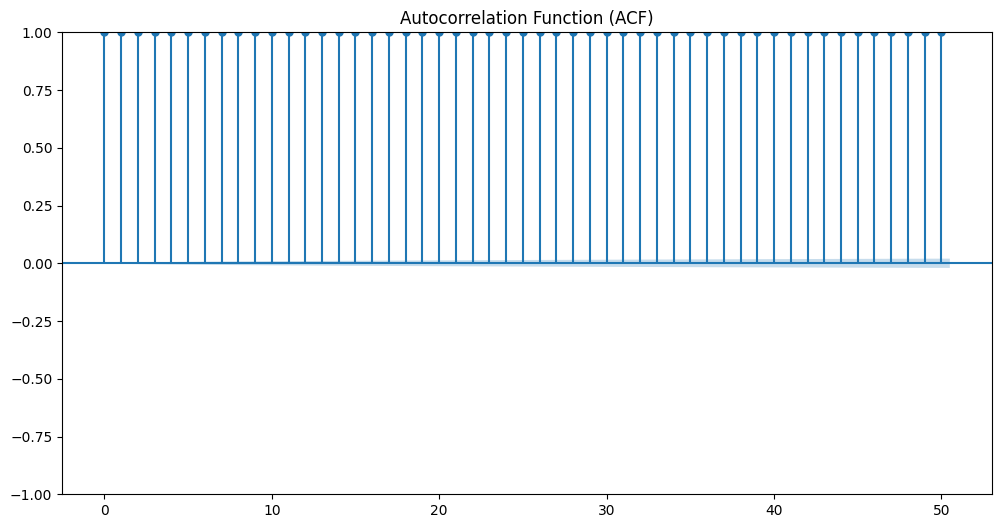

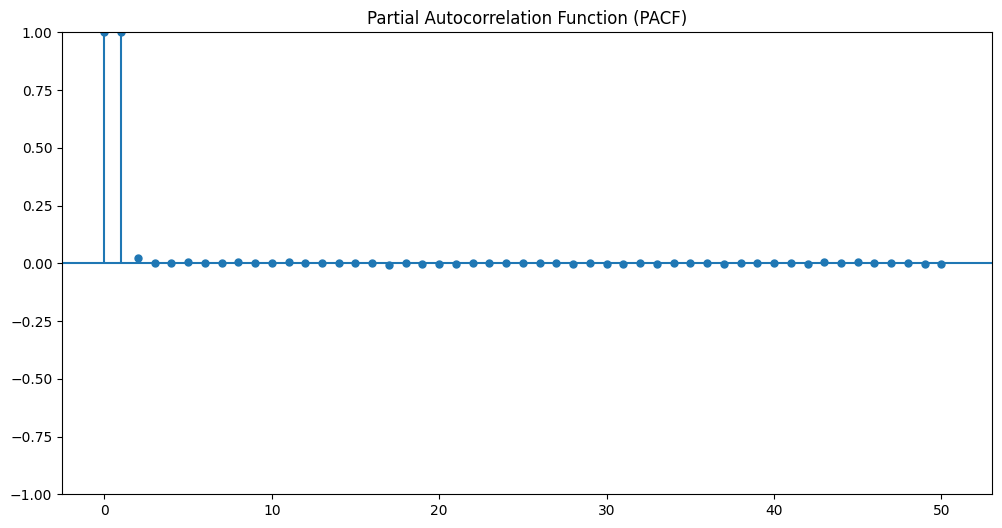

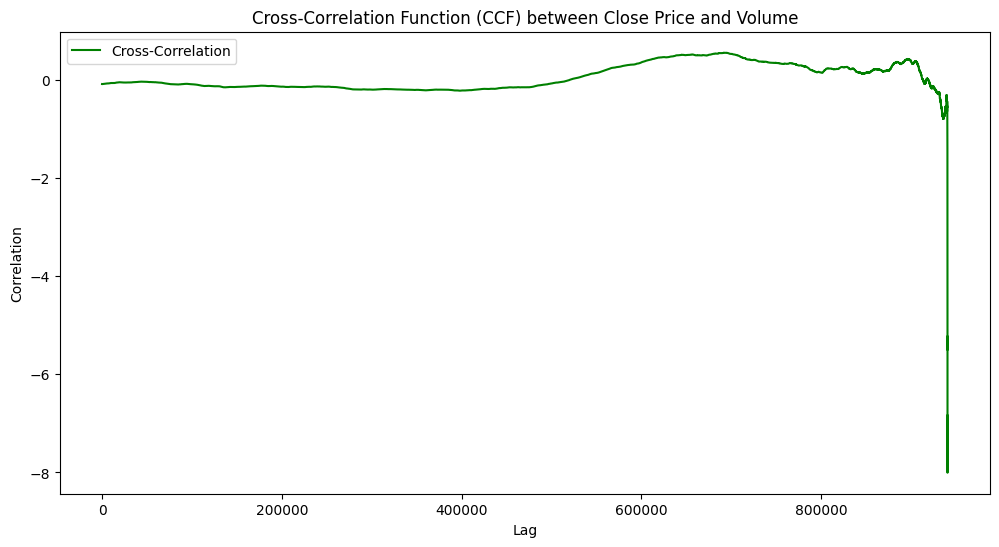

In [83]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import ccf

# ACF Plot
plt.figure(figsize=(12, 6))
plot_acf(df_sorted['close'], lags=50, ax=plt.gca())  # 50은 시차의 수, 필요에 맞게 조정
plt.title('Autocorrelation Function (ACF)')
plt.show()

# PACF Plot
plt.figure(figsize=(12, 6))
plot_pacf(df_sorted['close'], lags=50, ax=plt.gca())  # 50은 시차의 수, 필요에 맞게 조정
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# CCF Plot (Close와 Volume 간의 상관관계 예시)
# 'vol' 컬럼과 'close' 컬럼의 CCF 계산
cross_corr = ccf(df_sorted['close'], df_sorted['vol'])

# CCF Plot
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(cross_corr)), cross_corr, label='Cross-Correlation', color='green')
plt.title('Cross-Correlation Function (CCF) between Close Price and Volume')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.legend()
plt.show()
